In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
plt.rcParams['figure.figsize'] = 7,7
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

### Import data

In [3]:
subdir=[]
dir='/home/cadeniran/u1/amphiscan-pep/results_grid'
dirlist = [ item for item in os.listdir(dir) if os.path.isdir(os.path.join(dir, item)) ]
for dir in dirlist:
    subdir.append(dir)
subdir.sort()

In [4]:
# Load data w/ dictionary to hold the DataFrames
data=[]
df_pep = {}

for i in subdir:
    os.chdir("/home/cadeniran/u1/amphiscan-pep/results_grid/"+str(i))
    data = pd.read_csv("rmsd_values.csv", header=None, sep=',', engine='python', names=['ID', 'RMSD', 'z_increment', 'pert_num'])
    df_pep[str(i)] = pd.DataFrame(data)

In [5]:
for i in subdir:
    print(str(i)+":" , df_pep[str(i)].loc[:, 'RMSD'].mean().round(2))

0.1_10: 5.85
0.1_15: 5.75
0.1_20: 5.65
0.1_25: 5.82
0.1_30: 6.0
0.1_35: 5.75
0.1_40: 6.05
0.1_45: 5.91
0.1_50: 5.82
0.2_10: 5.4
0.2_15: 5.57
0.2_20: 5.96
0.2_25: 6.0
0.2_30: 6.08
0.2_35: 5.77
0.2_40: 5.32
0.2_45: 5.99
0.2_50: 5.61
0.3_10: 5.61
0.3_15: 5.69
0.3_20: 5.78
0.3_25: 6.17
0.3_30: 5.71
0.3_35: 6.15
0.3_40: 5.45
0.3_45: 5.94
0.3_50: 5.75
0.4_10: 5.47
0.4_15: 5.57
0.4_20: 5.5
0.4_25: 5.88
0.4_30: 5.89
0.4_35: 6.04
0.4_40: 6.05
0.4_45: 6.33
0.4_50: 6.04
0.5_10: 5.18
0.5_15: 5.61
0.5_20: 5.72
0.5_25: 5.37
0.5_30: 5.58
0.5_35: 5.76
0.5_40: 6.57
0.5_45: 6.0
0.5_50: 5.96
0.6_10: 5.06
0.6_15: 5.41
0.6_20: 5.77
0.6_25: 5.67
0.6_30: 5.66
0.6_35: 5.56
0.6_40: 5.59
0.6_45: 5.77
0.6_50: 6.23
0.7_10: 5.81
0.7_15: 5.77
0.7_20: 5.78
0.7_25: 6.08
0.7_30: 5.43
0.7_35: 5.74
0.7_40: 6.19
0.7_45: 6.26
0.7_50: 5.63
0.8_10: 5.21
0.8_15: 5.35
0.8_20: 5.33
0.8_25: 5.46
0.8_30: 5.83
0.8_35: 5.66
0.8_40: 5.46
0.8_45: 5.7
0.8_50: 5.93


In [6]:
inc_pert, avgs, stdev, variance = [], [], [], []
for i in subdir:
    inc_pert.append(i)
    avgs.append(df_pep[str(i)].loc[:, 'RMSD'].mean().round(2))
    stdev.append(df_pep[str(i)].loc[:, 'RMSD'].std().round(2))
    variance.append(df_pep[str(i)].loc[:, 'RMSD'].var().round(2))
df_stats = pd.DataFrame(columns=['Increment', 'Averages', 'STD' , 'Variance'])
df_stats['Increment'] = inc_pert
df_stats['Averages'] = avgs
df_stats['STD'] = stdev
df_stats['Variance'] = variance

In [7]:
df_less = df_stats.loc[df_stats['Averages'] < 5.5]
df_less

,Increment,Averages,STD,Variance
9,0.2_10,5.40,2.72,7.41
15,0.2_40,5.32,2.41,5.79
24,0.3_40,5.45,2.82,7.94
27,0.4_10,5.47,2.80,7.82
36,0.5_10,5.18,2.67,7.14
39,0.5_25,5.37,2.74,7.53
45,0.6_10,5.06,2.83,8.00
46,0.6_15,5.41,2.60,6.76
58,0.7_30,5.43,2.69,7.26
63,0.8_10,5.21,2.86,8.19


### Define data groupings

In [8]:
all_per = pd.DataFrame({'0.2_10': df_pep["0.2_10"]["RMSD"],
                        '0.2_40': df_pep["0.2_40"]["RMSD"],
                        '0.3_40': df_pep["0.3_40"]["RMSD"],
                        '0.4_10': df_pep["0.4_10"]["RMSD"],
                        '0.5_10': df_pep["0.5_10"]["RMSD"],
                        '0.5_25': df_pep["0.5_25"]["RMSD"],
                        '0.6_10': df_pep["0.6_10"]["RMSD"],
                        '0.6_15': df_pep["0.6_15"]["RMSD"],
                        '0.7_30': df_pep["0.7_30"]["RMSD"],
                        '0.8_10': df_pep["0.8_10"]["RMSD"],
                        '0.8_15': df_pep["0.8_15"]["RMSD"],
                        '0.8_20': df_pep["0.8_20"]["RMSD"],
                        '0.8_25': df_pep["0.8_25"]["RMSD"],
                        '0.8_40': df_pep["0.8_40"]["RMSD"]})

## Plot Boxplot RMSD

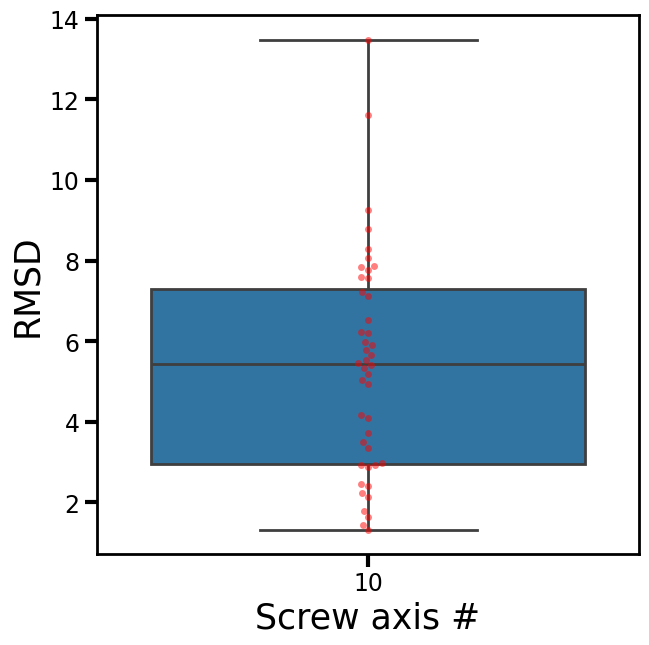

In [9]:
ax = sns.boxplot(x="pert_num", y="RMSD", data=df_pep["0.2_10"], showfliers = True, linewidth=2)
ax = sns.swarmplot(x="pert_num", y="RMSD", data=df_pep["0.2_10"], color="r", alpha=0.5)

#ax.set_ylim([0, 26])
plt.xlabel("Screw axis #", fontsize=25)
plt.ylabel("RMSD", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=3)

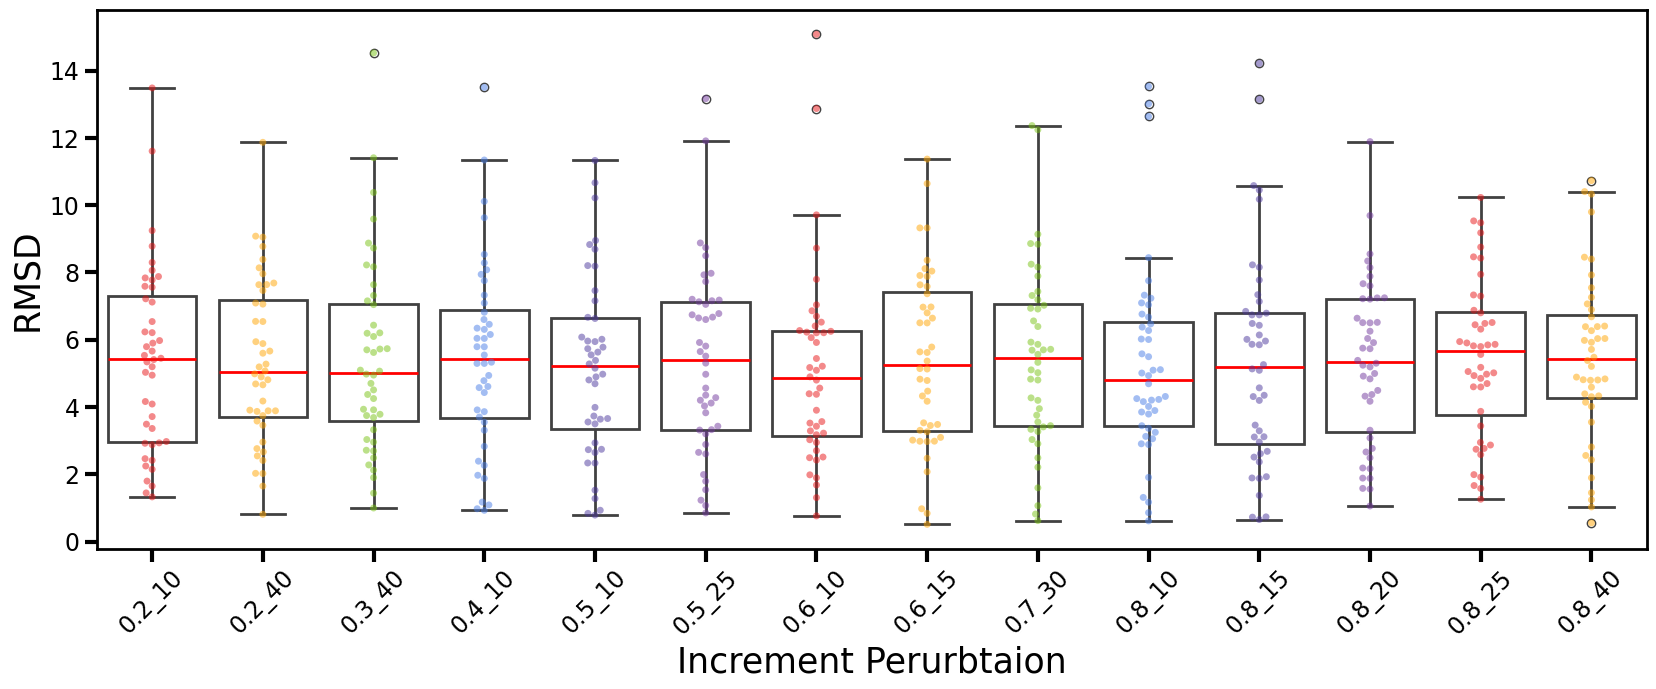

In [10]:
plt.rcParams['figure.figsize'] = 20,7
colors = ['#e81416', '#ffa500', '#79c314', '#487de7', '#4b369d', '#70369d',
          '#e81416', '#ffa500', '#79c314', '#487de7', '#4b369d', '#70369d', '#e81416', '#ffa500']

ax = sns.boxplot(data=all_per, linewidth=2, color="white", medianprops=dict(color="red", alpha=1),)
ax = sns.swarmplot(data=all_per, palette=colors, alpha=0.5)

#ax.set_ylim([0, 27])
plt.xlabel("Increment Perurbtaion", fontsize=25)
plt.xticks(rotation=45)
plt.ylabel("RMSD", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=3)

#plt.show()
plt.savefig("/home/cadeniran/ipn/figs/all-pep.png", transparent=True, bbox_inches='tight')

## Plot Variance

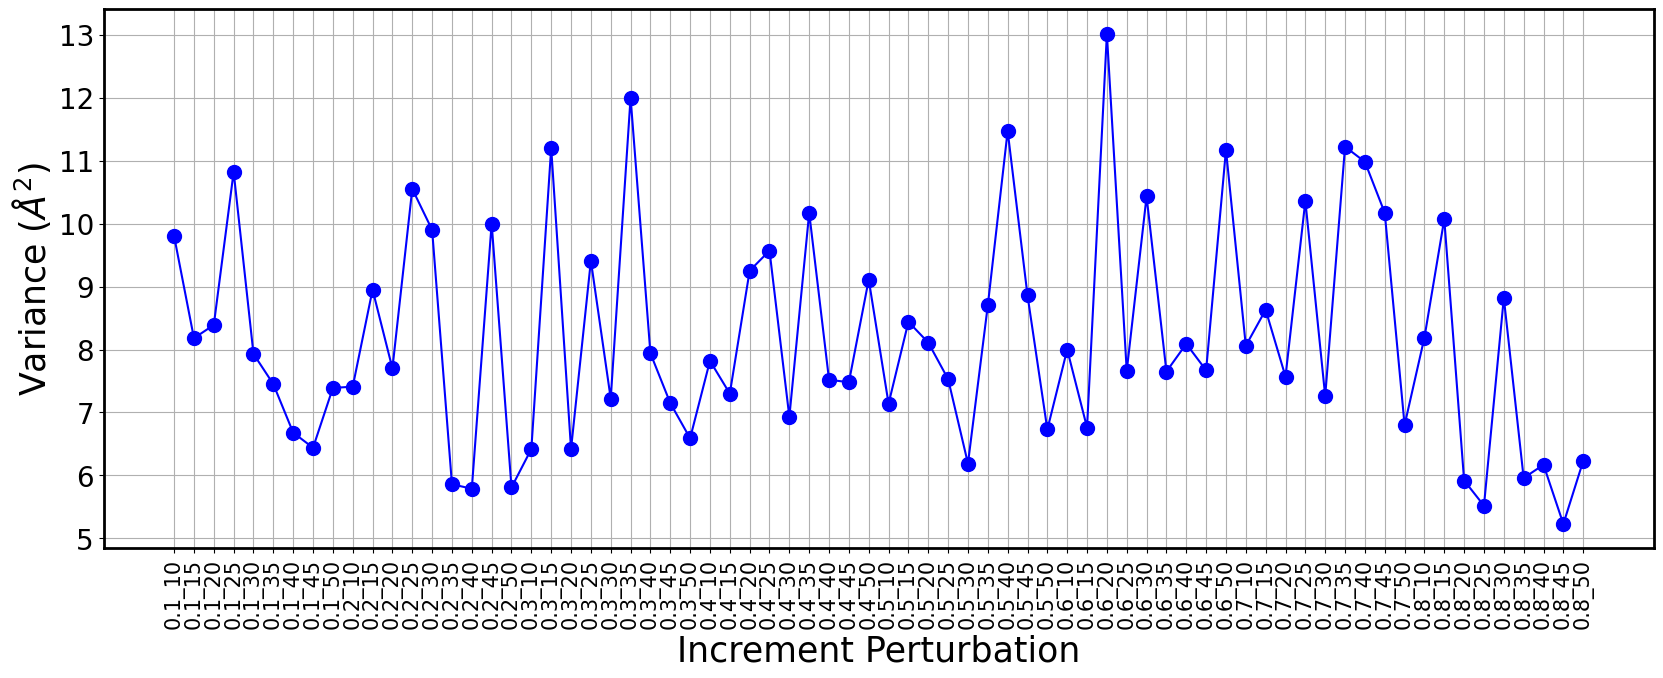

In [11]:
plt.rcParams['figure.figsize'] = 20,7

X=df_stats['Increment']
Y=df_stats['Variance']

# Plot
fig,ax=plt.subplots()
ax.plot(X, Y, marker="o", markersize=10, c='blue')
ax.grid(True)
ax.set_xlabel("Increment Perturbation", fontsize=25)
ax.set_ylabel("Variance ($\AA^{2}$)", fontsize=25)
ax.tick_params(axis='x', rotation=90, labelsize=15)
ax.tick_params(axis='y', labelsize=20)
#plt.ylim(0, 12)

# Save figure
plt.savefig("/home/cadeniran/ipn/figs/variance72.png", format='png',bbox_inches='tight')

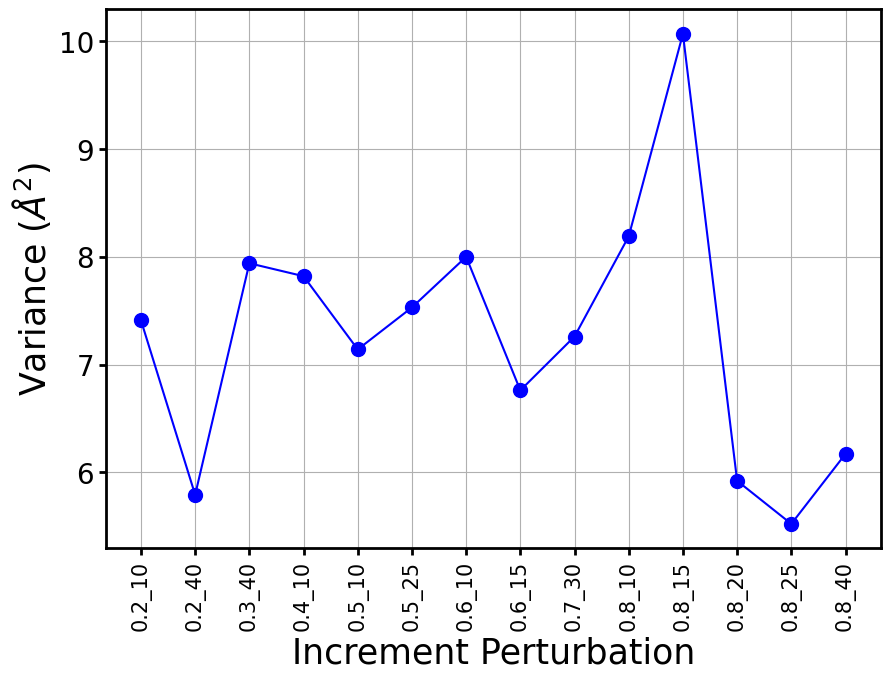

In [13]:
plt.rcParams['figure.figsize'] = 10,7

X=df_less['Increment']
Y=df_less['Variance']

# Plot
plt.plot(X, Y, marker="o", markersize=10, c='blue')
plt.grid(True)
plt.xlabel("Increment Perturbation", fontsize=25)
plt.ylabel("Variance ($\AA^{2}$)", fontsize=25)
plt.tick_params(axis='x', rotation=90, labelsize=15, length=5, width=2)
plt.tick_params(axis='y', labelsize=20, length=5, width=2)

# Save figure
plt.savefig("/home/cadeniran/ipn/figs/variance14.png", format='png',bbox_inches='tight')